# Supervised Learning Project - Metaverse Transactions 

The Open Metaverse is a vast and interconnected virtual world that operates without a central authority. In this digital landscape, blockchain technology is essential for handling transactions, overseeing digital possessions, and maintaining secure and transparent interactions among users. This dataset is designed to capture the intricate and ever-changing blockchain activities within the metaverse, serving as a fundamental resource for exploring and advancing metaverse-related technologies.

Our goal is to detect the existence of anomalies within a transaction by evaluating based on the supevised learning model we are building


In [301]:
%reset -f

import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE




metaverse_data = pd.read_csv('metaverse_transactions_dataset.csv')

metaverse_data.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [302]:
metaverse_data.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


Now we will take a look at the number of rows and columns avaiulable in the dataset: 


In [303]:
print("Number of rows:", metaverse_data.shape[0])
print("Number of columns:", metaverse_data.shape[1])

Number of rows: 78600
Number of columns: 14


Now, lets look at data types: 

In [304]:
metaverse_data.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [305]:
print(metaverse_data.dtypes)

timestamp             object
hour_of_day            int64
sending_address       object
receiving_address     object
amount               float64
transaction_type      object
location_region       object
ip_prefix            float64
login_frequency        int64
session_duration       int64
purchase_pattern      object
age_group             object
risk_score           float64
anomaly               object
dtype: object


As you can see, we have two columns regarding time, timestamp and hour of day, to simplify our job we will drop the timestamp column as they both pratically refer to the same thing 

In [306]:
metaverse_data.drop(columns=['timestamp'], inplace=True)

Lets look at the first rows to see the effects of dropping the column

In [307]:
metaverse_data.head()

,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [308]:
metaverse_data.isnull().sum()

hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

We can see that there are no missing values, but we can still check for duplicate data: 

In [309]:
metaverse_data.duplicated().sum()

0

There is also no duplicated data

We have chosen to remove the receiving and sending addresses, as we aren't sure about how to handle them, as they are not numerical, and enconding them wouldn't pose us that great of an advantage. 

Of course we could argue that knowing addresses involved with high anomaly risk would be a great indicator as it is probably the same person involved. But, we don't think that in a real world scenario, with a test set these variables could be of great value. 

In [310]:
metaverse_data.drop(columns=['receiving_address'],  inplace=True)
metaverse_data.drop(columns=['sending_address'], inplace=True)

metaverse_data.head()


,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,19,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,16,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,9,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,14,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


We'll now encode the remaining categorical variables so we can use them all in our models 

In [311]:
metaverse_data['transaction_type'] = LabelEncoder().fit_transform(metaverse_data['transaction_type'])
metaverse_data['location_region'] = LabelEncoder().fit_transform(metaverse_data['location_region'])
metaverse_data['purchase_pattern'] = LabelEncoder().fit_transform(metaverse_data['purchase_pattern'])
metaverse_data['age_group'] = LabelEncoder().fit_transform(metaverse_data['age_group'])

metaverse_data.head()

,hour_of_day,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,4,2,192.000,3,48,0,0,18.75,low_risk
1,19,0.010000,1,4,172.000,5,61,0,0,25.00,low_risk
2,16,778.197390,1,1,192.168,3,74,0,0,31.25,low_risk
3,9,300.838358,4,4,172.000,8,111,1,2,36.75,low_risk
4,14,775.569344,2,0,172.160,6,100,1,2,62.50,moderate_risk


Now since risk score and anomaly are correlated lets see exactly how they correlate, by seeing what the value boundaries are for a certain risk score to be high, medium, or low for example. To do that lets plot a risk score to anomaly graphic.

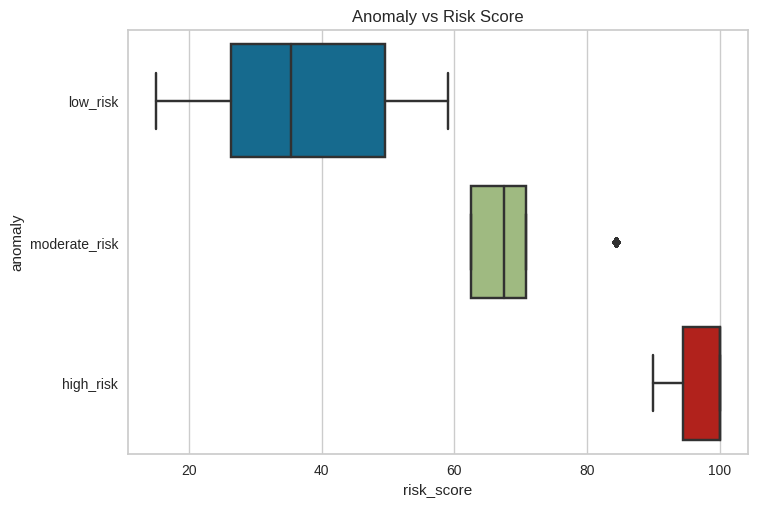

In [312]:
sns.boxplot(x='risk_score', y='anomaly', data=metaverse_data)
plt.title('Anomaly vs Risk Score')

plt.show()

We can now clearly see the ranges of each risk, 

By observing the plot we can see that by risk score, from 0-60 corresponds to low_risk, from 60-90, to moderate_risk, and from 90 onwards to high risk

Now lets take a look at the distribution of these classes on the whole dataset, this will allow us to later know whether we want to sample our training data or not, in case it is too imbalanced. Ideally we want a balanced data set, so it handles the test set better

In [313]:
grouped_data = metaverse_data.groupby('anomaly')

for name, group in grouped_data:
    if name == 'low_risk':
        low_risk = group.copy()
    elif name == 'high_risk':
        high_risk = group.copy()
    elif name == 'moderate_risk':
        moderate_risk = group.copy()

print("Low Risk Transactions:", len(low_risk))
print("High Risk Transactions:", len(high_risk))
print("Moderate Risk Transactions:", len(moderate_risk))

Low Risk Transactions: 63494
High Risk Transactions: 6495
Moderate Risk Transactions: 8611


As you can see from the output, we will need to apply sampling so we have a more balanced training set which will prepare our model for the test set.

To have a more efficient test we analyzed column by column, to see if perhaps one of the columns would probably not be of help, and by doing that we got to the region column. We calculated the average risk score by region, to see if maybe one region had more scams than the others. Let's take a look:


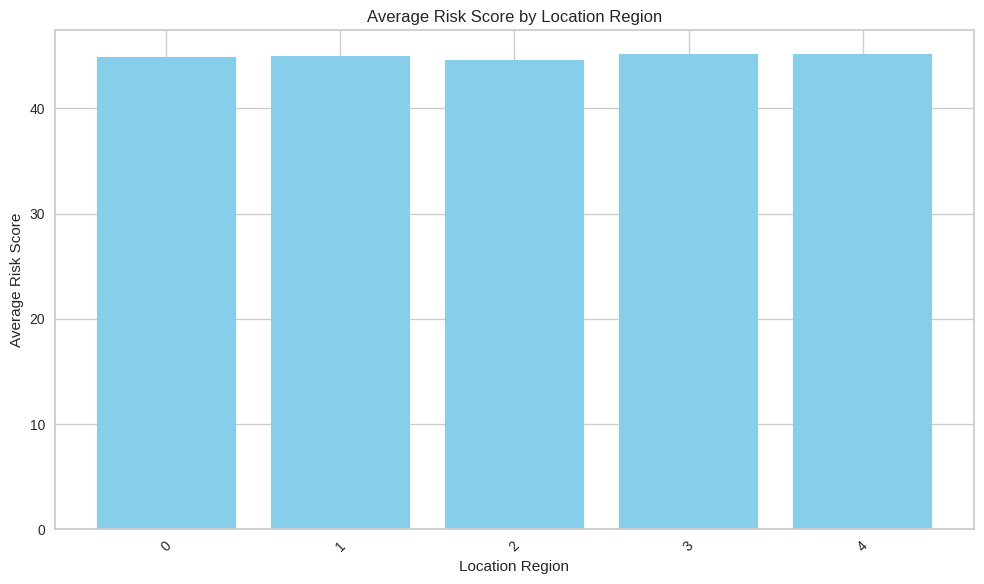

In [314]:
risk_average = metaverse_data.groupby('location_region')['risk_score'].mean()

plt.figure(figsize=(10, 6))

plt.bar(risk_average.index, risk_average.values, color='skyblue')


plt.title('Average Risk Score by Location Region')
plt.xlabel('Location Region')
plt.ylabel('Average Risk Score')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It seems like all regions have similar averages. Our interpretation is that the region won't influence our model in the evaluation, so we may drop that column.

In [315]:
metaverse_data.drop(columns=['location_region'], inplace=True)

metaverse_data.head()

,hour_of_day,amount,transaction_type,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,4,192.000,3,48,0,0,18.75,low_risk
1,19,0.010000,1,172.000,5,61,0,0,25.00,low_risk
2,16,778.197390,1,192.168,3,74,0,0,31.25,low_risk
3,9,300.838358,4,172.000,8,111,1,2,36.75,low_risk
4,14,775.569344,2,172.160,6,100,1,2,62.50,moderate_risk


We are now left with 10 of the original 14 columns, allowing us to now proceed to the preparation of our training set. We will start by also encoding our target variable, which will allow us to construct/build our model. 



In [316]:
metaverse_data['anomaly'] = LabelEncoder().fit_transform(metaverse_data['anomaly'])

metaverse_data.head()

,hour_of_day,amount,transaction_type,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,12,796.949206,4,192.000,3,48,0,0,18.75,1
1,19,0.010000,1,172.000,5,61,0,0,25.00,1
2,16,778.197390,1,192.168,3,74,0,0,31.25,1
3,9,300.838358,4,172.000,8,111,1,2,36.75,1
4,14,775.569344,2,172.160,6,100,1,2,62.50,2


Lets take a look at our data types again

In [317]:
metaverse_data.dtypes

hour_of_day           int64
amount              float64
transaction_type      int64
ip_prefix           float64
login_frequency       int64
session_duration      int64
purchase_pattern      int64
age_group             int64
risk_score          float64
anomaly               int64
dtype: object

Lets now split our data into inputs and the output/target:

In [318]:
input_data = metaverse_data.drop(columns=['anomaly'], axis=1)
output_data = metaverse_data['anomaly']

As we previously saw, there is a huge imbalance in our data set between high_risk and moderate and low risk: 

Low Risk Transactions: 63494
High Risk Transactions: 6495
Moderate Risk Transactions: 8611

Due to the imbalance we will use sampling to address our issue, but first lets split the data into training and test set:

In [319]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

y_train.value_counts(), y_test.value_counts()

(anomaly
 1    50646
 2    50646
 0    50646
 Name: count, dtype: int64,
 anomaly
 1    12848
 2     1621
 0     1251
 Name: count, dtype: int64)

Now that we have everything prepared, we can start the training

In [325]:
from pycaret.classification import *

classification = setup(data = metaverse_data, train_size=0.8, target = 'anomaly', session_id=42, normalize=True, transformation=True)

best = compare_models()

results = pull()
results


,Description,Value
0,Session id,42
1,Target,anomaly
2,Target type,Multiclass
3,Original data shape,"(78600, 8)"
4,Transformed data shape,"(78600, 8)"
5,Transformed train set shape,"(62880, 8)"
6,Transformed test set shape,"(15720, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8676,0.0000,0.8676,0.8012,0.8318,0.5528,0.5673,3.7440
lightgbm,Light Gradient Boosting Machine,0.8659,0.9019,0.8659,0.8269,0.8307,0.5470,0.5613,3.1390
rf,Random Forest Classifier,0.8453,0.8975,0.8453,0.8200,0.8285,0.5013,0.5055,0.8040
lda,Linear Discriminant Analysis,0.8385,0.0000,0.8385,0.7650,0.7991,0.3767,0.4091,0.0710
lr,Logistic Regression,0.8367,0.0000,0.8367,0.7618,0.7952,0.3487,0.3893,0.1280
knn,K Neighbors Classifier,0.8365,0.8527,0.8365,0.8105,0.8207,0.4630,0.4673,0.1930
et,Extra Trees Classifier,0.8316,0.8792,0.8316,0.8113,0.8197,0.4532,0.4561,0.6890
svm,SVM - Linear Kernel,0.8232,0.0000,0.8232,0.7461,0.7653,0.1874,0.2649,0.1210
ada,Ada Boost Classifier,0.8141,0.0000,0.8141,0.7589,0.7487,0.1083,0.1855,0.4160
ridge,Ridge Classifier,0.8100,0.0000,0.8100,0.7340,0.7295,0.0288,0.0991,0.0670


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

The fact that we have 8 algorithms, running with a perfect accuracy is suspicious, some attribute must be outweighting the others, lets check: 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

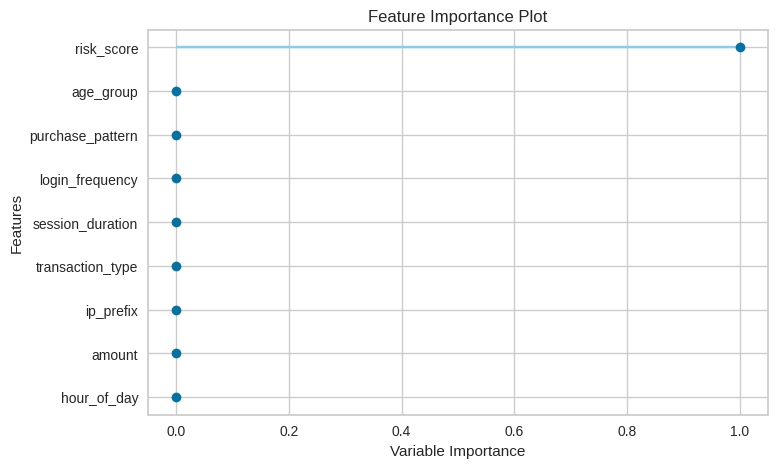

In [321]:
# Create a Decision Tree model
dt = create_model('dt')

# Plot feature importance
plot_model(dt, plot = 'feature')

By observing this plot, risk score clearly outweights every other metric, because they are directly correlated. The risk score is kinf of what we want to predict, but in form of anomaly in categories. For that reason, we will also drop the risk score, which will allow us to build a more realistic model.

Another column that would cause the same issue is transaction_type, because it also has values like phishing and scam, that are directly correlated with a high anomaly risk. We will drop that one as well.

In [322]:
metaverse_data.drop(columns=['risk_score'], inplace=True)
metaverse_data.drop(columns=['transaction_type'], inplace=True)
metaverse_data.head()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,anomaly
0,12,796.949206,192.000,3,48,0,0,1
1,19,0.010000,172.000,5,61,0,0,1
2,16,778.197390,192.168,3,74,0,0,1
3,9,300.838358,172.000,8,111,1,2,1
4,14,775.569344,172.160,6,100,1,2,2


In [326]:
input_data = metaverse_data.drop(columns=['anomaly'], axis=1)
output_data = metaverse_data['anomaly']

X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

y_train.value_counts(), y_test.value_counts()

classification = setup(data = metaverse_data, train_size=0.8, target = 'anomaly', session_id=42, normalize=True, transformation=True)

best = compare_models()

results = pull()
results


,Description,Value
0,Session id,42
1,Target,anomaly
2,Target type,Multiclass
3,Original data shape,"(78600, 8)"
4,Transformed data shape,"(78600, 8)"
5,Transformed train set shape,"(62880, 8)"
6,Transformed test set shape,"(15720, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8676,0.0000,0.8676,0.8012,0.8318,0.5528,0.5673,3.7480
lightgbm,Light Gradient Boosting Machine,0.8659,0.9019,0.8659,0.8269,0.8307,0.5470,0.5613,2.9490
rf,Random Forest Classifier,0.8453,0.8975,0.8453,0.8200,0.8285,0.5013,0.5055,0.8320
lda,Linear Discriminant Analysis,0.8385,0.0000,0.8385,0.7650,0.7991,0.3767,0.4091,0.0710
lr,Logistic Regression,0.8367,0.0000,0.8367,0.7618,0.7952,0.3487,0.3893,0.1170
knn,K Neighbors Classifier,0.8365,0.8527,0.8365,0.8105,0.8207,0.4630,0.4673,0.2270
et,Extra Trees Classifier,0.8316,0.8792,0.8316,0.8113,0.8197,0.4532,0.4561,0.7010
svm,SVM - Linear Kernel,0.8232,0.0000,0.8232,0.7461,0.7653,0.1874,0.2649,0.1470
ada,Ada Boost Classifier,0.8141,0.0000,0.8141,0.7589,0.7487,0.1083,0.1855,0.4140
ridge,Ridge Classifier,0.8100,0.0000,0.8100,0.7340,0.7295,0.0288,0.0991,0.0750


Processing:   0%|          | 0/61 [00:00<?, ?it/s]